In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dataset_handler import DatasetHandler

In [2]:
handler = DatasetHandler("Electric_Vehicle_Population_Data.csv")
handler.clean_dataset(printing=True)

years=sorted(handler._df['Model Year'].unique())
yearly=[]
for year in years:
    byyear=handler._df.loc[handler._df['Model Year'] == year].values
    yearly.append([x[10] for x in byyear])

boxplot_data = {
    'xlabel': 'Model Year',
    'ylabel': 'Electric Range',
    'title' : 'Electric Range by Model Year',
    'x': yearly,
    'y': years
}
PHEV=handler._df[handler._df['Electric Vehicle Type']=='PHEV']
boxplot_data_PHEV = {
    'xlabel': 'Make',
    'ylabel': 'Electric Range',
    'title' : 'Electric Range by Manufacturer for PHEV',
    'x': [PHEV[PHEV['Make'] == make]['Electric Range'] for make in PHEV['Make'].unique()],
    'y': PHEV['Make'].unique()
}
BEV=handler._df[handler._df['Electric Vehicle Type']=='BEV']
boxplot_data_BEV = {
    'xlabel': 'Make',
    'ylabel': 'Electric Range',
    'title' : 'Electric Range by Manufacturer for BEV',
    'x': [BEV[BEV['Make'] == make]['Electric Range'] for make in BEV['Make'].unique()],
    'y': BEV['Make'].unique()
}

# displays the makes and the number of cars in each section
maker_data = {
    'xlabel': 'Make',
    'ylabel': 'No. of Vehicles',
    'title' : 'Top 10 Different Makers',
    'x': handler._df['Make'].value_counts().head(10).index.to_list(),
    'y': handler._df['Make'].value_counts().head(10).to_list()
}

# displays the Model and the number of cars in each section
model_data = {
    'xlabel': 'Make',
    'ylabel': 'No. of Vehicles',
    'title' : 'Top 10 Different Models',
    'x': handler._df['Model'].value_counts().head(10).index.to_list(),
    'y': handler._df['Model'].value_counts().head(10).to_list()
}

car_type = {
    'title' : 'Vehicle type distribution',
    'y': handler._df['Electric Vehicle Type'].value_counts().index.to_list(),
    'x': handler._df['Electric Vehicle Type'].value_counts().to_list()
}

eligibility = {
    'title' : 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'y': handler._df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index.to_list(),
    'x': handler._df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().to_list()
}

yeartotal_barplot = {
    'xlabel': 'Year',
    'ylabel': 'No. of Vehicles',
    'title' : 'Yearly Total',
    'x': handler._df['Model Year'].value_counts().index.to_list(),
    'y': handler._df['Model Year'].value_counts().to_list()
}


                                                   NaN
VIN (1-10)                                           0
County                                               4
City                                                 4
State                                                0
Postal Code                                          4
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       5
Base MSRP                                            5
Legislative District                               445
DOL Vehicle ID                                       0
Vehicle Location                                    10
Electric Utility                                     4
2020 Census Tract                                    4


In [3]:
print("Years:",min(years),":",max(years))
print("Geographical:")
print("*",len(handler._df['State'].unique()),'states')
print("*",len(handler._df['County'].unique()),'counties')
print("*",len(handler._df['City'].unique()),'cities')
print("*",len(handler._df['Electric Utility'].unique()),'electric utilities')
print("\nMakes and Models:")
print("*",len(handler._df['Make'].unique()),'makes')
print("*",len(handler._df['Model'].unique()),'models')

handler._df.describe(exclude='number').T

Years: 1999 : 2025
Geographical:
* 47 states
* 203 counties
* 758 cities
* 74 electric utilities

Makes and Models:
* 43 makes
* 153 models


,count,unique,top,freq
VIN (1-10),210165,12377,7SAYGDEE6P,1215
County,210165,203,King,107115
City,210165,758,Seattle,33854
State,210165,47,WA,209720
Make,210165,43,TESLA,91379
Model,210165,153,MODEL Y,44038
Electric Vehicle Type,210165,2,BEV,165554
Clean Alternative Fuel Vehicle (CAFV) Eligibility,210165,3,Unkown,118654
Legislative District,210165,50,41,13196
Vehicle Location,210165,931,POINT (-122.13158 47.67858),5256


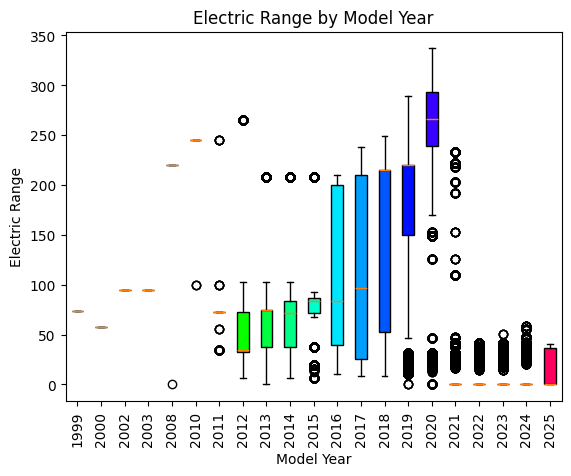

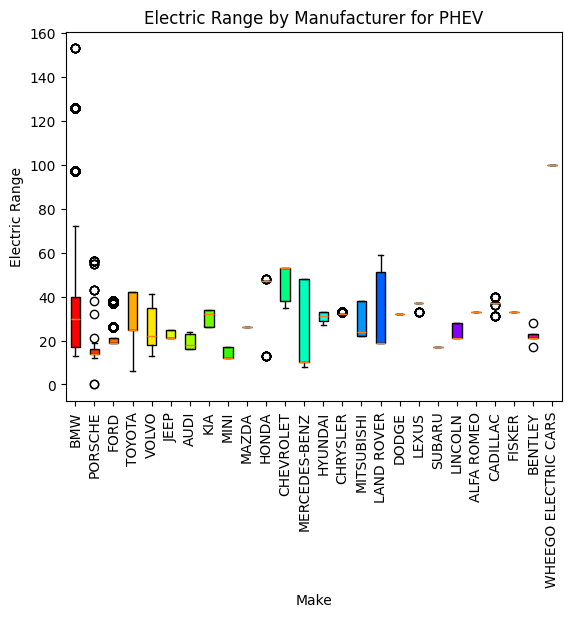

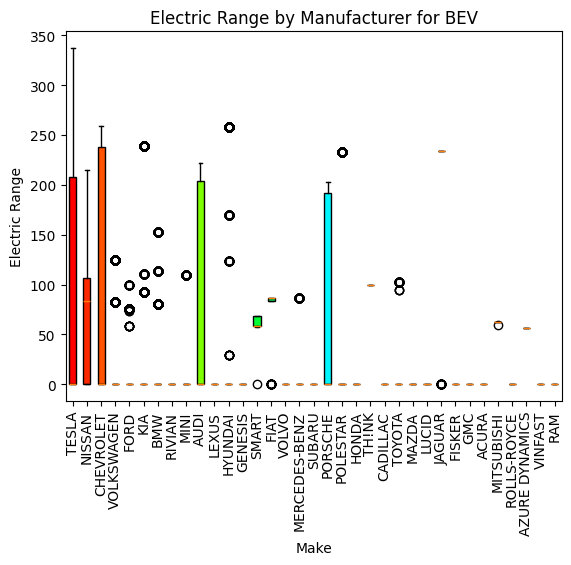

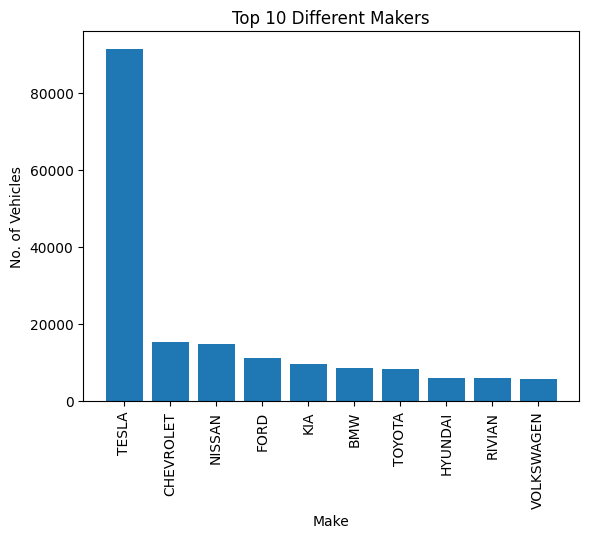

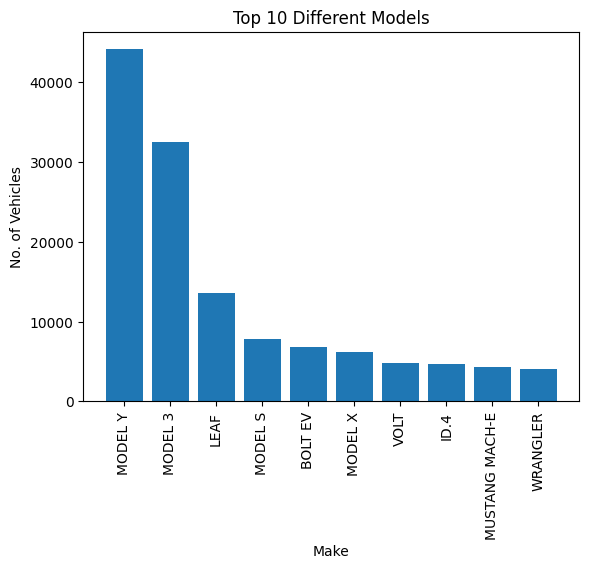

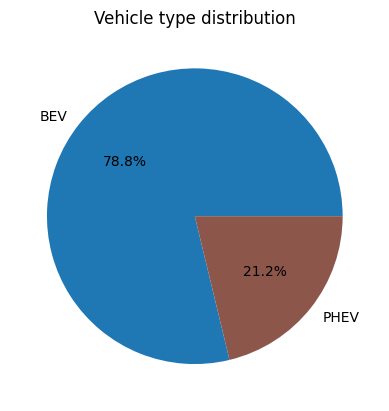

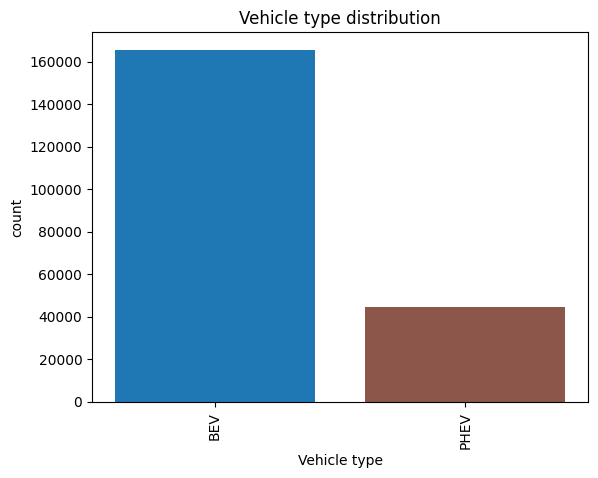

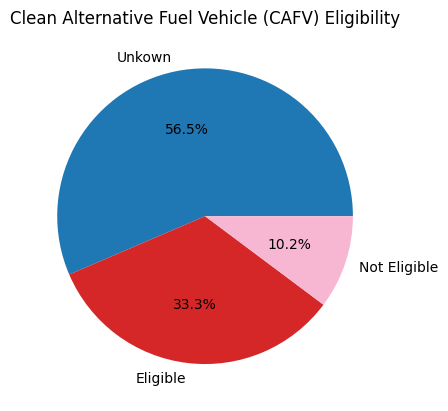

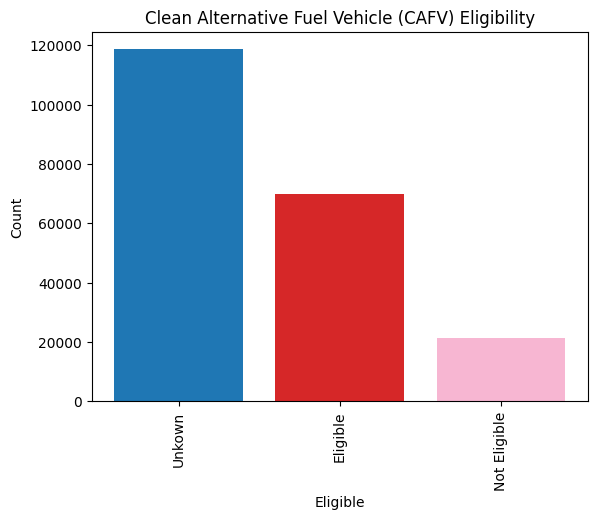

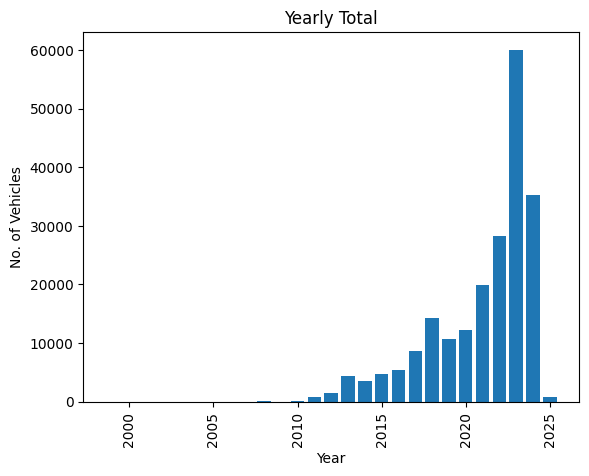

In [4]:
handler._plot = True
handler.create_boxplot(data=boxplot_data, patch_artist=True)
handler.create_boxplot(data=boxplot_data_PHEV, patch_artist=True)
handler.create_boxplot(data=boxplot_data_BEV, patch_artist=True)
handler.create_barplot(maker_data)
handler.create_barplot(model_data)
handler.create_piechart(car_type, patch_artist=True)
handler.create_barplot({
    'xlabel': 'Vehicle type',
    'ylabel': 'count',
    'title' : 'Vehicle type distribution',
    'y': handler._df['Electric Vehicle Type'].value_counts().to_list(),
    'x': handler._df['Electric Vehicle Type'].value_counts().index.to_list()
}, patch_artist=True)
handler.create_piechart(eligibility, patch_artist=True)
handler.create_barplot({
    'xlabel': 'Eligible',
    'ylabel': 'Count',
    'title' : 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'y': handler._df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().to_list(),
    'x': handler._df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index.to_list()
}, patch_artist=True)
handler.create_barplot(yeartotal_barplot)